In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [77]:
df= pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [79]:
df.isna().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


In [80]:
df.duplicated().sum()

np.int64(0)

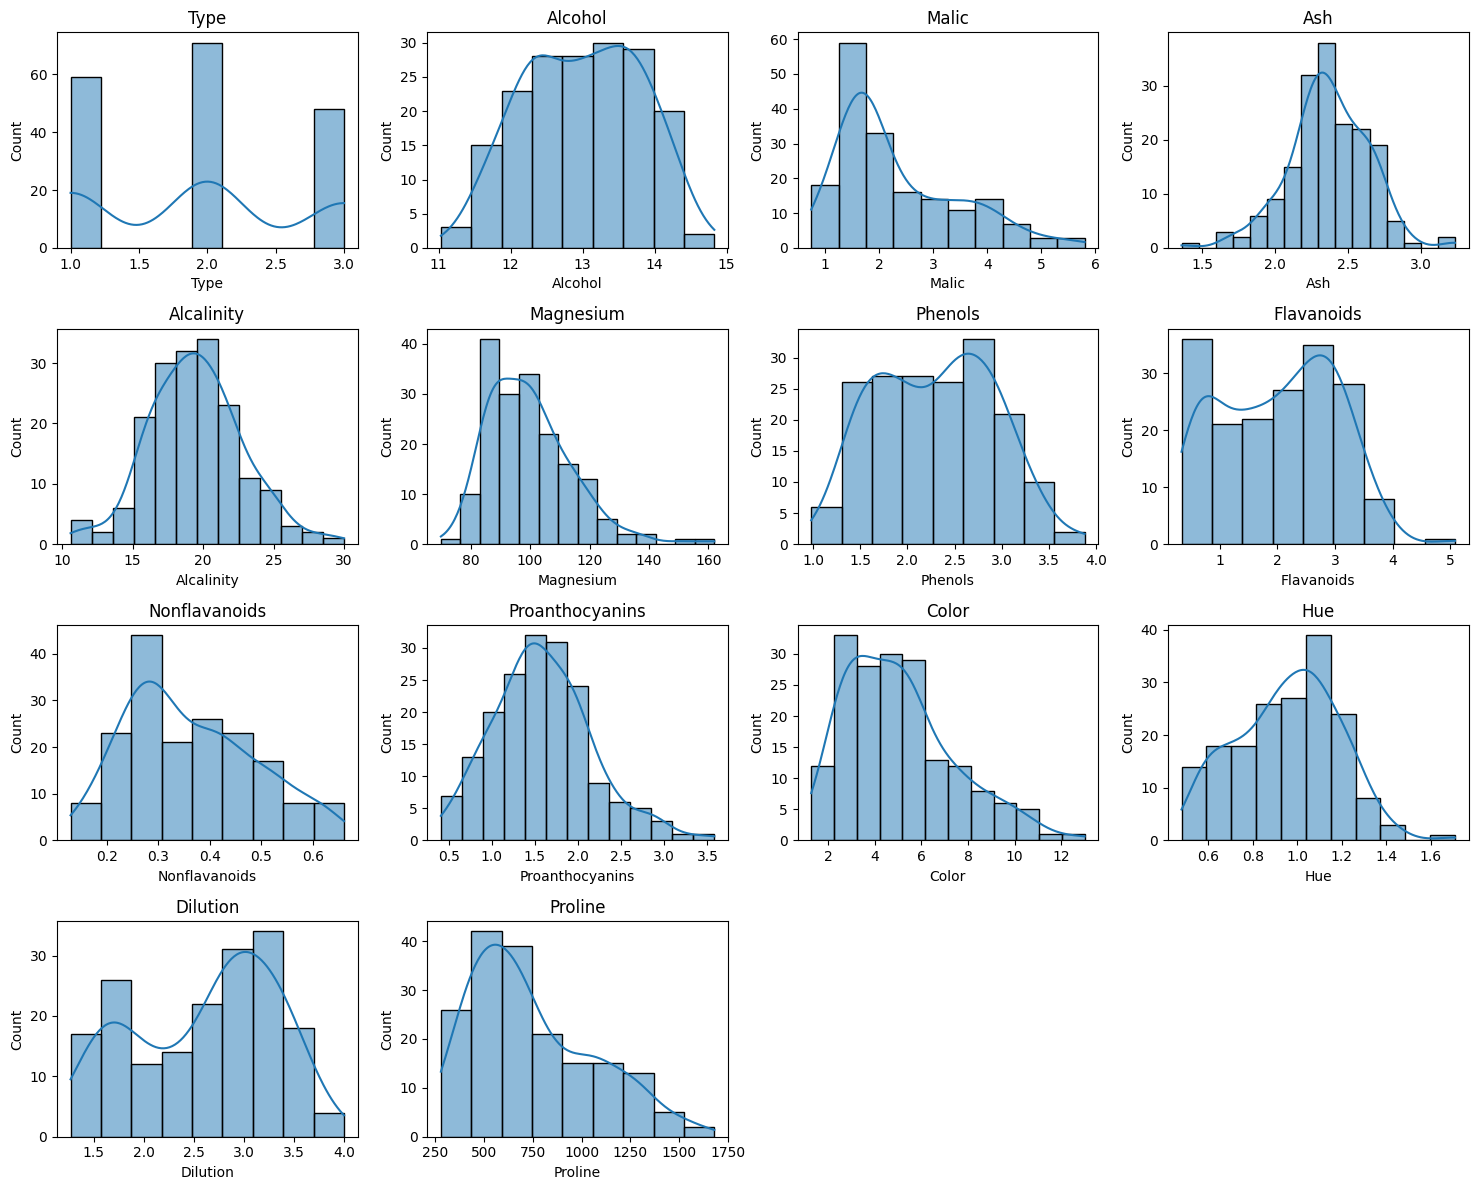

In [81]:
# Histograms
plt.figure(figsize=(15, 12))

for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

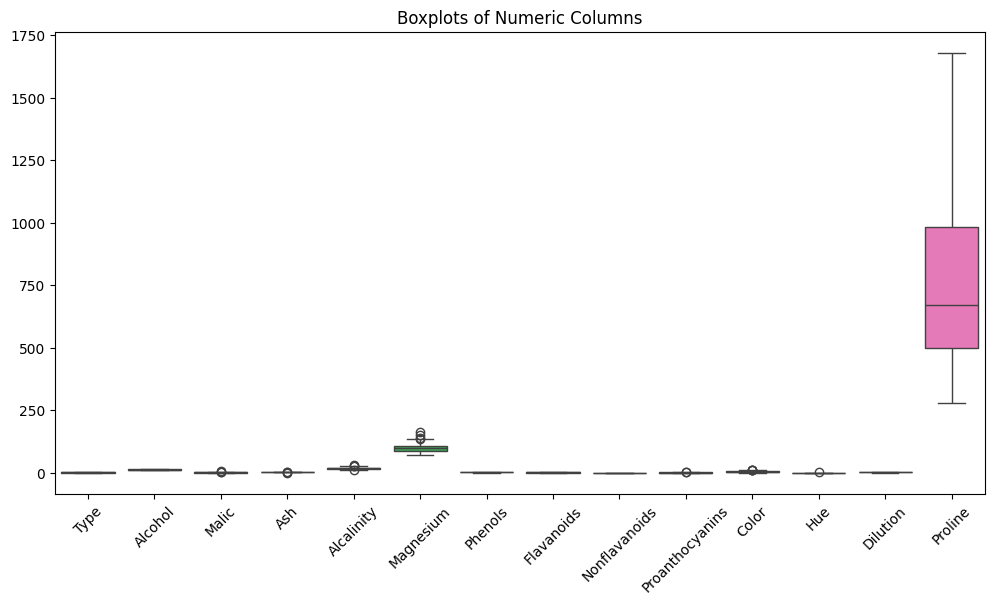

In [82]:
# Boxplots for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplots of Numeric Columns")
plt.xticks(rotation=45)
plt.show()

In [83]:
# correlation heatmap
corr = df.corr()

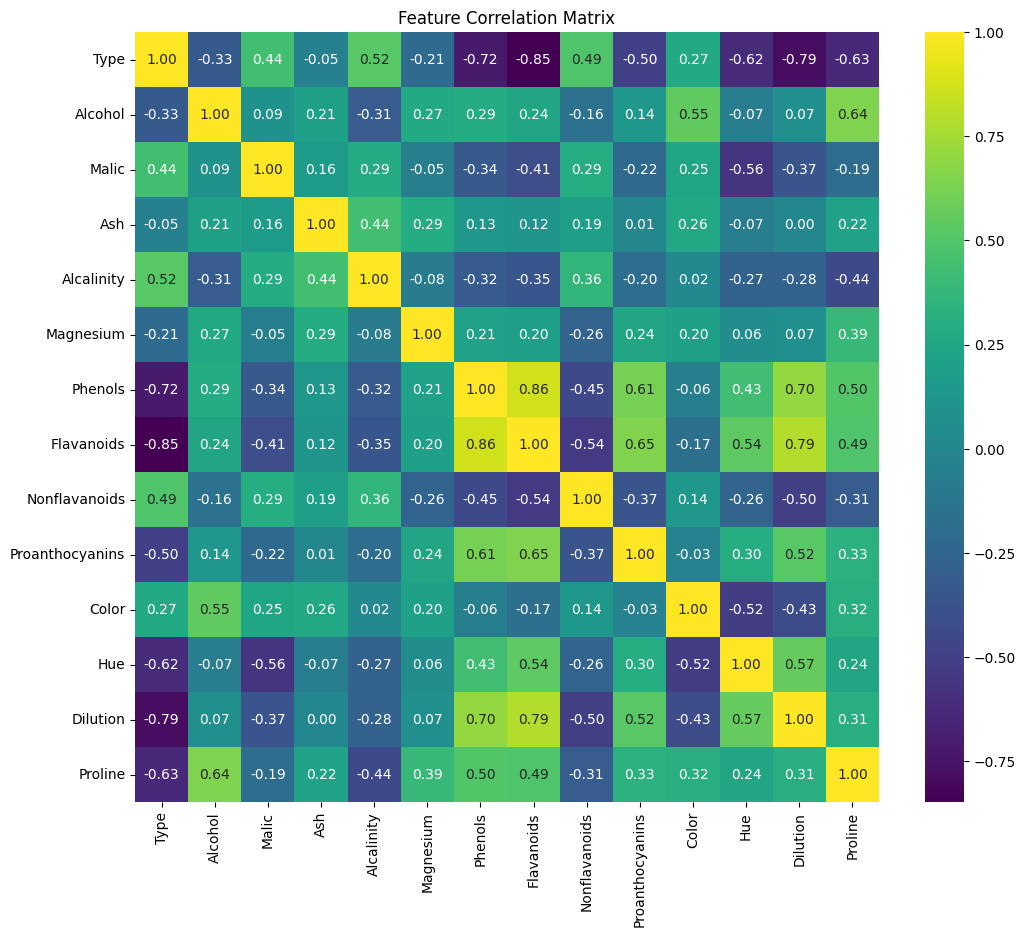

In [84]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Task 2: Dimensionality Reduction with PCA:


In [85]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [86]:
# Apply PCA
pca = PCA()
pca.fit(x_scaled)

PCA()

In [87]:
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

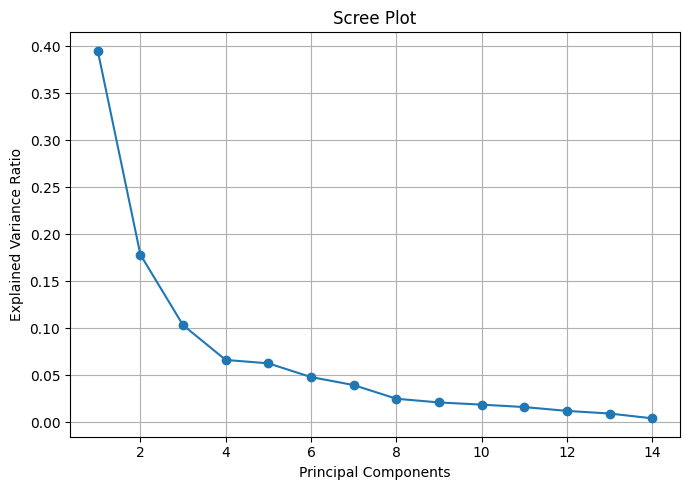

In [88]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained)+1), explained, marker="o")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.tight_layout()
plt.grid(True)
plt.show()

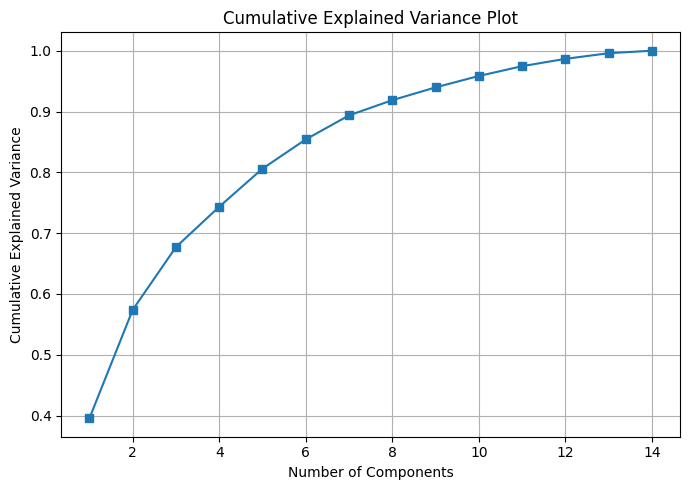

In [89]:
# ----- Cumulative Explained Variance -----
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cum_explained)+1), cum_explained, marker="s")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Plot")
plt.tight_layout()
plt.grid(True)
plt.show()

In [90]:
# Choose 2 PCs
pca2 = PCA(n_components=2)
x_pca2 = pca2.fit_transform(x_scaled)

In [91]:
# K-Means
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(x_scaled)

In [92]:
sil_orig = silhouette_score(x_scaled, clusters_orig)
db_orig = davies_bouldin_score(x_scaled, clusters_orig)

In [93]:
print("\n--- Original Data Clustering ---")
print("Silhouette Score:", sil_orig)
print("Davies–Bouldin Index:", db_orig)


--- Original Data Clustering ---
Silhouette Score: 0.30648398324833453
Davies–Bouldin Index: 1.315707552261773


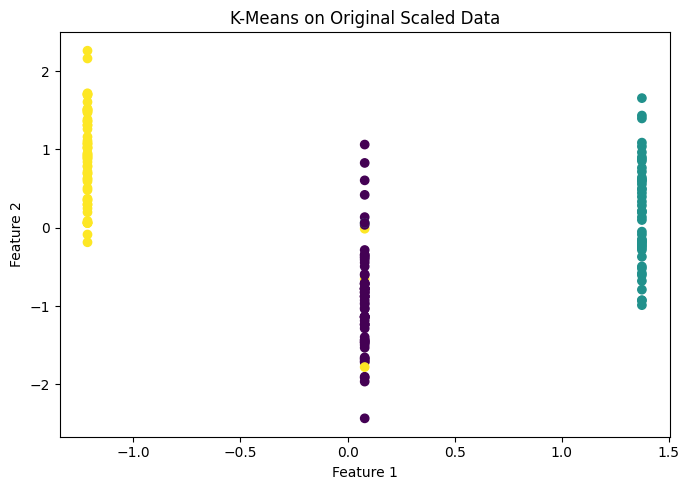

In [94]:
# Visualize clusters (Original data)
plt.figure(figsize=(7,5))
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters_orig)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means on Original Scaled Data")
plt.tight_layout()
plt.show()

In [95]:
# K-MEANS on PCA Data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(x_pca2)

sil_pca = silhouette_score(x_pca2, clusters_pca)
db_pca = davies_bouldin_score(x_pca2, clusters_pca)

In [96]:
print("\nPCA Data Clustering")
print("Silhouette Score:", sil_pca)
print("Davies–Bouldin Index:", db_pca)


PCA Data Clustering
Silhouette Score: 0.6024415520362845
Davies–Bouldin Index: 0.5397078562575713


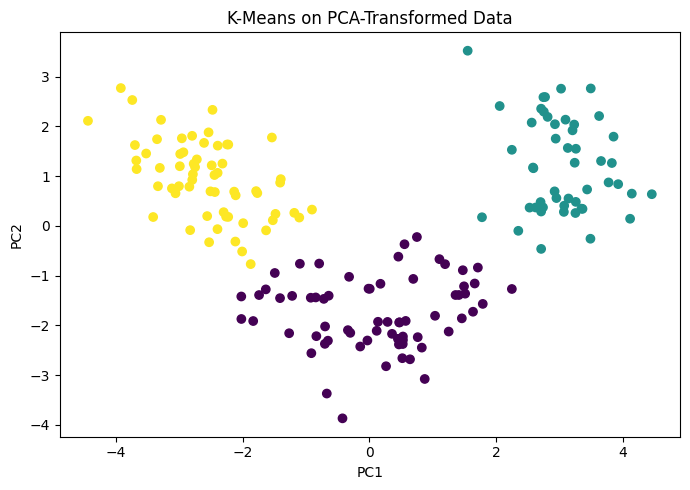

In [97]:
# Visualize PCA Clusters
plt.figure(figsize=(7,5))
plt.scatter(x_pca2[:,0], x_pca2[:,1], c=clusters_pca)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means on PCA-Transformed Data")
plt.tight_layout()
plt.show()

In [98]:
# Comparison
print("\n============= CLUSTERING COMPARISON =============")
print("Silhouette (Original):", sil_orig)
print("Silhouette (PCA):", sil_pca)
print("DB Index (Original):", db_orig)
print("DB Index (PCA):", db_pca)


============= CLUSTERING COMPARISON =============
Silhouette (Original): 0.30648398324833453
Silhouette (PCA): 0.6024415520362845
DB Index (Original): 1.315707552261773
DB Index (PCA): 0.5397078562575713


In [99]:
if sil_pca > sil_orig:
    print("\n PCA improved clustering performance.")
else:
    print("\n Original data performed better than PCA.")


 PCA improved clustering performance.


Key Findings

PCA reduced the number of features while keeping most of the important information.

Clustering after PCA gave clearer and better-separated groups compared to using the original data.

The evaluation scores (silhouette and Davies–Bouldin) also showed improvement with PCA.

Practical Implications

PCA helps remove noise and simplifies the dataset, making clustering algorithms like K-means work better.

It also makes it easier to visualize data in 2D or 3D.

Recommendations

Use PCA when you have many features or when features are highly correlated.

Use clustering on original data when the dataset is small or when you want to interpret results using the original features